In [1]:
import sys
import os
if os.path.abspath('../sample') not in sys.path:
    sys.path.insert(0, os.path.abspath('../sample'))
if os.path.abspath('../model') not in sys.path:
    sys.path.insert(0, os.path.abspath('../model'))
    
from current_plot import *
import final_tests as test
import autosimilarity_segmentation as as_seg

# Final results

In this notebook are presented our final segmentation results for this version of the code. These are the results presented in the paper.

## Parameters

In [3]:
# Fixed hyperparams
subdivision = 96
annotations_type = "MIREX10"
penalty_func = "modulo8" # "Favouring 8, then modulo 4"

In [3]:
# Paths
entire_rwc = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\Entire RWC"
even_songs = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\Even songs"
odd_songs = "C:\\Users\\amarmore\\Desktop\\Audio samples\\RWC Pop\\Odd songs"

For these final tests, we will try ranks for $H$ and $Q$ in the range [12,16,20,24,28,32,36,40,44,48], and a range for the parameter $\lambda$ of $[0,2[$ with a step of $0.1$.

In [5]:
ranks_rhythm = [12,16,20,24,28,32,36,40,44,48]
ranks_pattern = [12,16,20,24,28,32,36,40,44,48]
penalty_range = [i/10 for i in range(0,20)]

Below is the convolution kernel we will use.

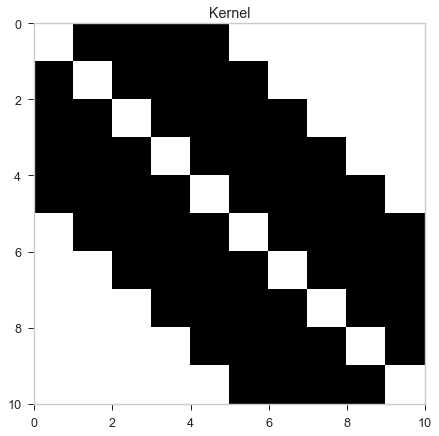

In [5]:
plot_me_this_spectrogram(as_seg.compute_all_kernels(10)[-1], title="Kernel", x_axis = None, y_axis = None)

#  Unincluded: Fixed parameters

We begin by a condition (not included in the paper) where we fix all parameters. In that sense, it's a totally blind method. Parameters though, are fixed empirically.

Parameter $\lambda$ was fixed to 1 as it was the best parameter in the experimental notebook for the method "Favouring 8, then modulo 4".

Ranks were set to 32 for both $H$ and $Q$, as it is generally a good compromise.

In [6]:
test.final_results_fixed_conditions(entire_rwc, [12,32,32], penalty_weight = 1, annotations_type = annotations_type, subdivision = subdivision, penalty_func = penalty_func, legend = "à paramètres fixés en dur.")

C:\Users\amarmore\Desktop\Projects\PhD main projects\Releases\NTD for segmentation\sample\autosimilarity_segmentation.py:45: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
Résultats à 0.5 secondes à paramètres fixés en dur.,11.78,11.28,7.03,0.5281,0.6318,0.569


,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
Résultats à 3 secondes à paramètres fixés en dur.,14.92,8.14,3.89,0.6638,0.7958,0.7162


# Cross validation on parameters

In order to find accurate parameters, we decided to proceed by 2-fold cross-validation.

Here, ranks for $H$ and $Q$ and $\lambda$ are learned on even songs and then tested on odd songs, and vice-versa.

Final results, in the paper, are means of results on both tests subsets.

Firstly:
 - learning on even songs
 - testing on odd songs

In [6]:
best_param_even = test.several_ranks_with_cross_validation_of_param_RWC(learning_dataset = even_songs, testing_dataset = odd_songs,
                                                      ranks_rhythm = ranks_rhythm, ranks_pattern = ranks_pattern, penalty_range = penalty_range, annotations_type = annotations_type, subdivision = subdivision, penalty_func = penalty_func)

C:\Users\amarmore\Desktop\Projects\PhD main projects\On Git\Code\Tensor factorization\sample\autosimilarity_segmentation.py:44: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


,Meilleur rang de $H$,Meilleur rang de $Q$,Meilleur lambda de pondération de convolution.
Paramètres appris,40.0,28.0,0.8


,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
"Résultats à 0.5 secondes , sur dataset de test.",12.28,12.62,6.9,0.517,0.6491,0.5655


,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
"Résultats à 3 secondes , sur dataset de test.",14.98,9.92,4.2,0.6308,0.7936,0.691


Secondly:
 - learning on odd songs
 - testing on even songs

In [7]:
best_param_odd = test.several_ranks_with_cross_validation_of_param_RWC(learning_dataset = odd_songs, testing_dataset = even_songs,
                                                      ranks_rhythm = ranks_rhythm, ranks_pattern = ranks_pattern, penalty_range = penalty_range, annotations_type = annotations_type, subdivision = subdivision, penalty_func = penalty_func)

,Meilleur rang de $H$,Meilleur rang de $Q$,Meilleur lambda de pondération de convolution.
Paramètres appris,48.0,24.0,1.6


,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
"Résultats à 0.5 secondes , sur dataset de test.",11.0,9.64,7.44,0.548,0.593,0.5664


,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
"Résultats à 3 secondes , sur dataset de test.",14.28,6.36,4.16,0.7048,0.7679,0.7307


# Oracle ranks

This below contains the results in the oracle ranks condition, which means that, for each song, we keep only the ranks leading to the best F measure.

In [8]:
penalty_weight = 1 # Fixed to one rather than learned, for convenience
test.oracle_ranks(entire_rwc, ranks_rhythm, ranks_pattern, penalty_weight, annotations_type = annotations_type, subdivision = subdivision, penalty_func = penalty_func)

,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
"Rangs oracles, à 0.5 secondes",14.6,7.93,4.21,0.6709,0.782,0.7146


,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
"Rangs oracles, à 3 secondes",16.87,5.29,1.94,0.7846,0.9022,0.831


For convenience, we also show the distribution histogram of the best ranks (as an image). These results can be found in the notebook studying the chosen convolution (8 bands convolution, notebook 5.2): <img src="imgs/hist_ranks_oracle.png"/>

# On signal

Below are presented the results when we segment directly the autosimilarity of the signal.

This allows us to compare the benefit directly related to the NTD in the segmentation.

In [5]:
test.cross_validation_on_signal(even_songs, odd_songs, penalty_range)

C:\Users\amarmore\Desktop\Projects\PhD main projects\On Git\Code\Tensor factorization\sample\autosimilarity_segmentation.py:44: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


,Meilleur lambda de pondération de convolution.
Paramètres appris,1.5


,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
", sur dataset de test.",8.94,12.08,10.24,0.4326,0.4798,0.4475


,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
", sur dataset de test.",12.9,8.12,6.28,0.6246,0.6833,0.6429


1.5

In [6]:
test.cross_validation_on_signal(odd_songs, even_songs, penalty_range)

,Meilleur lambda de pondération de convolution.
Paramètres appris,1.7


,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
", sur dataset de test.",7.96,10.84,10.48,0.429,0.4337,0.4297


,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
", sur dataset de test.",12.5,6.3,5.94,0.6721,0.6763,0.672


1.7

Also not included in the paper are below the results of the segmentation of the autosimilarity of the signal on the entire RWC dataset, but without the penalty regularization function. As we can see, the penalty function greatly impactes the segmentation when sementing the signal.

In [4]:
test.results_on_signal_without_lambda(entire_rwc, legend = ", on the signal and on all RWC, without penalty function.")

C:\Users\amarmore\Desktop\Projects\PhD main projects\Releases\NTD for segmentation\sample\autosimilarity_segmentation.py:45: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
"Résultats à 0.5 secondes , on the signal and on all RWC, without penalty function.",6.83,18.4,11.98,0.2813,0.3706,0.3164


,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
"Résultats à 3 secondes , on the signal and on all RWC, without penalty function.",11.44,13.79,7.37,0.4558,0.61,0.5165
